<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-датасета" data-toc-modified-id="Загрузка-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка датасета</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Рассмотрим,-как-выглядят-наши-данные" data-toc-modified-id="Рассмотрим,-как-выглядят-наши-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Рассмотрим, как выглядят наши данные</a></span></li><li><span><a href="#Создадим-признаки-для-обучения-модели." data-toc-modified-id="Создадим-признаки-для-обучения-модели.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создадим признаки для обучения модели.</a></span></li><li><span><a href="#Используем-TimeSeriesSplit-вместо-CV" data-toc-modified-id="Используем-TimeSeriesSplit-вместо-CV-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Используем TimeSeriesSplit вместо CV</a></span></li><li><span><a href="#Создадим-cv-выборку-для-временных-рядов-через-TimeSeriesSplit." data-toc-modified-id="Создадим-cv-выборку-для-временных-рядов-через-TimeSeriesSplit.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Создадим cv выборку для временных рядов через TimeSeriesSplit.</a></span></li><li><span><a href="#Вывод-по-шагу-2" data-toc-modified-id="Вывод-по-шагу-2-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод по шагу 2</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Вывод-V2" data-toc-modified-id="Вывод-V2-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод V2</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ridge</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import PowerTransformer
from itertools import product
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
pt = PowerTransformer()

### Загрузка датасета

In [2]:
data_taxi = pd.read_csv("datasets/taxi.csv", index_col=[0], parse_dates=[0])
data_taxi.sort_index(inplace=True)
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


## Анализ

### Рассмотрим, как выглядят наши данные

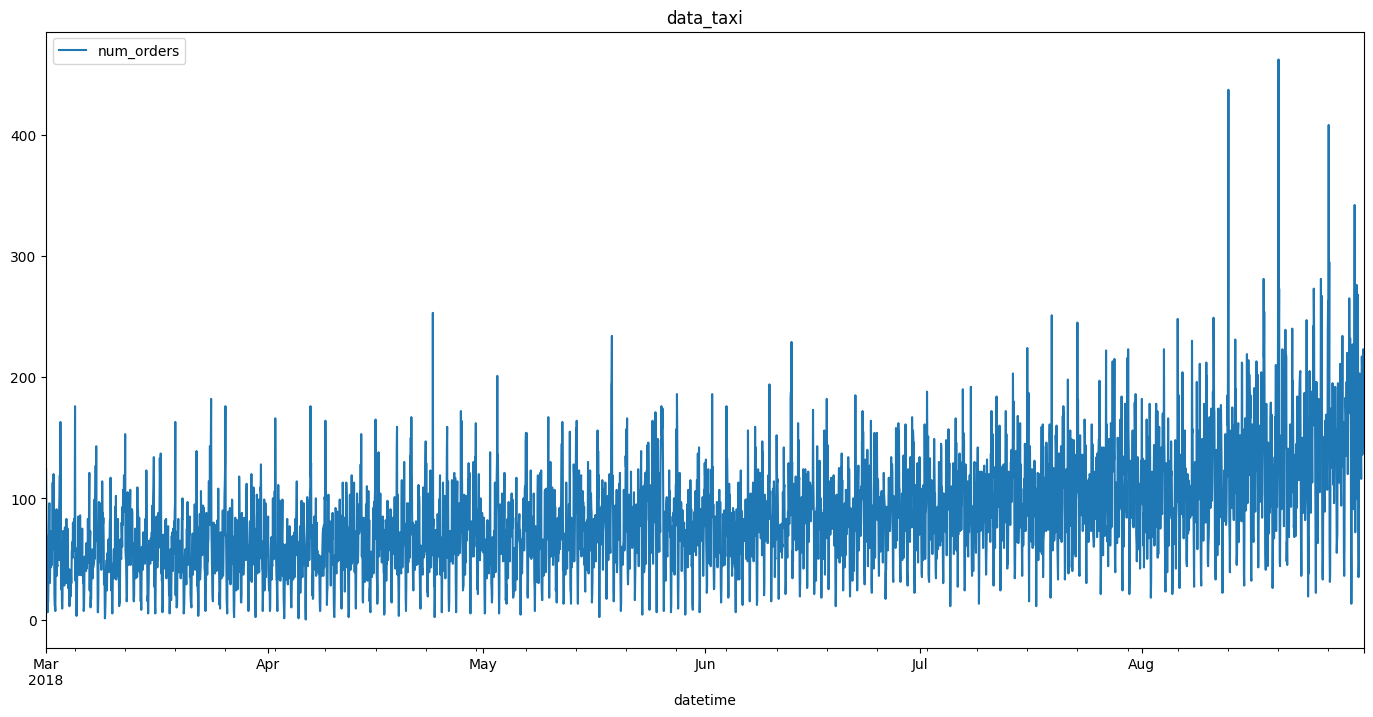

In [3]:
data_taxi = data_taxi .resample('1H').sum()
figsize = (17,8)
data_taxi.plot(figsize=figsize, title=('data_taxi'));

    Рассмотрим данные по последней неделе

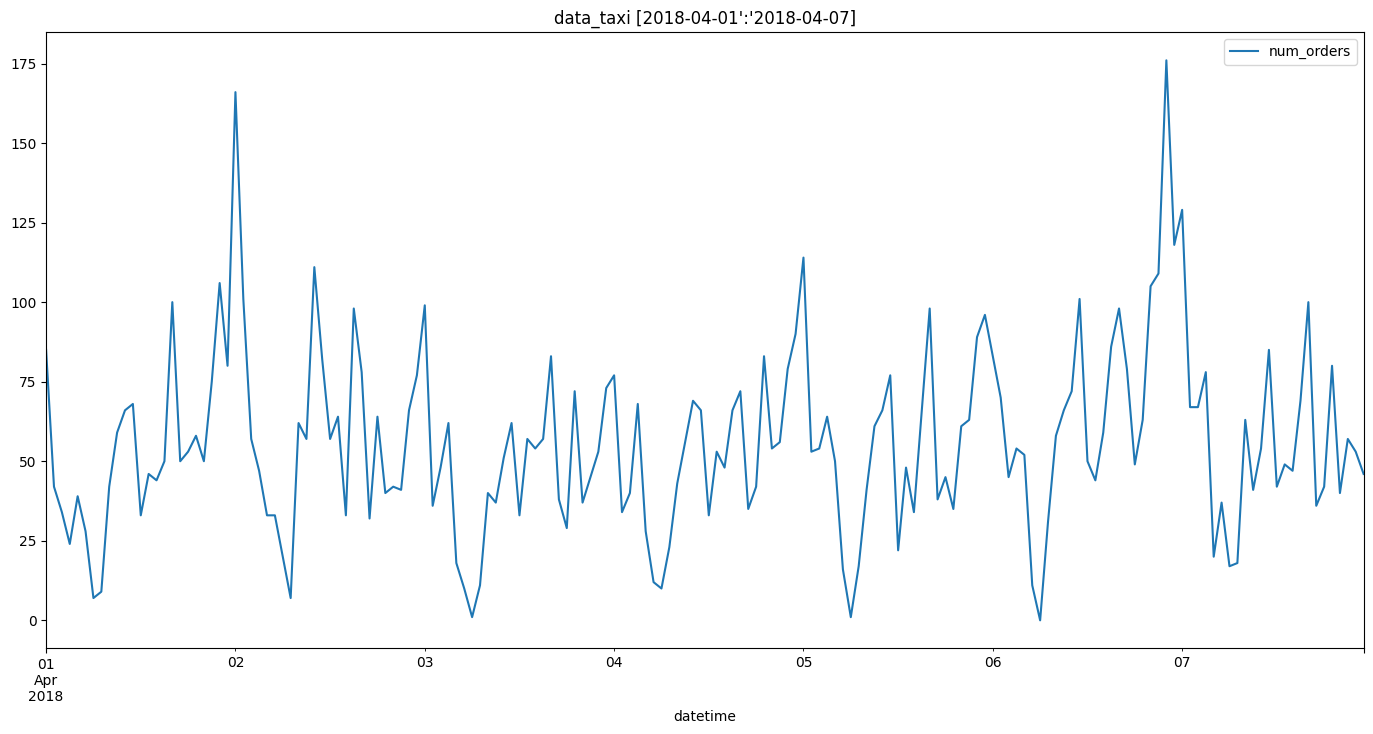

In [4]:
data_taxi['2018-04-01':'2018-04-07'].plot(figsize=figsize, title=("data_taxi [2018-04-01':'2018-04-07]"));

    Изучим тренды и сезонность заказа такси

In [5]:
decomposed_data_taxi = seasonal_decompose(data_taxi)
#decomposed_data_taxi.trend.plot(figsize=figsize, title=('trend'));

decomposed_data_taxi.seasonal.plot(figsize=figsize, title=('seasonal'));

decomposed_data_taxi.resid.plot(figsize=figsize, title=('resid'));

    Повторим разделение на сезонность и тренды за последнюю неделю

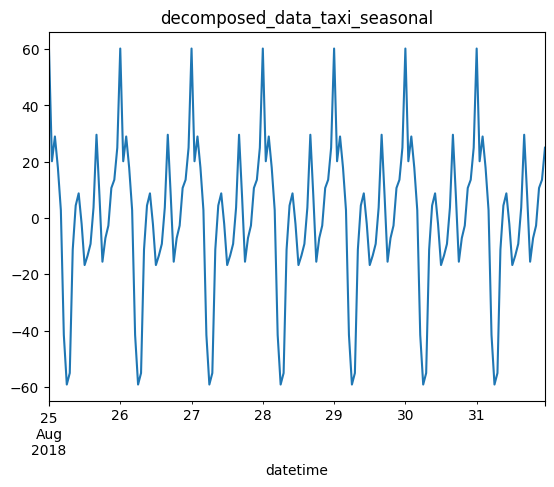

In [6]:
decomposed_data_taxi.seasonal['2018-08-25': '2018-08-31'].plot(ax=plt.gca(), title=('decomposed_data_taxi_seasonal'));

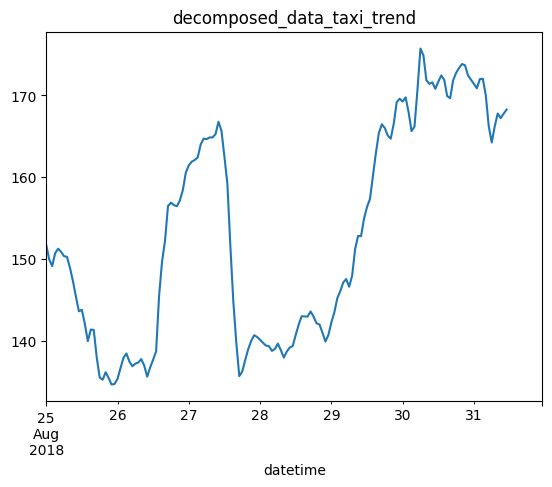

In [7]:
decomposed_data_taxi.trend['2018-08-25': '2018-08-31'].plot(ax=plt.gca(), title=('decomposed_data_taxi_trend'));

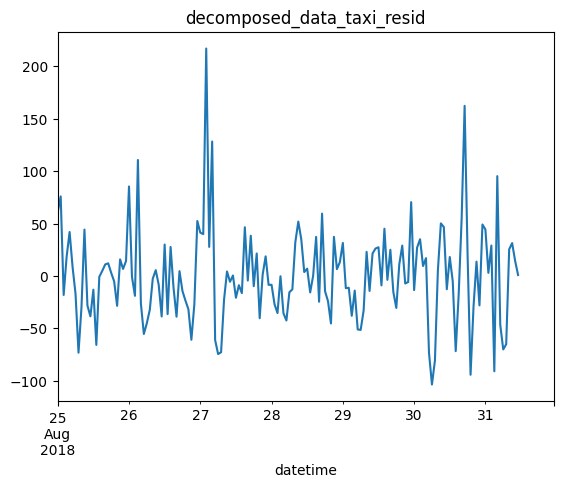

In [8]:
decomposed_data_taxi.resid['2018-08-25': '2018-08-31'].plot(ax=plt.gca(), title=('decomposed_data_taxi_resid'));

decomposed_data_taxi = seasonal_decompose(data_taxi['2018-08-25':'2018-08-31'])
decomposed_data_taxi.trend.plot(figsize=figsize, title=('trend 2018-08-25 : 2018-08-31'));

decomposed_data_taxi.seasonal.plot(figsize=figsize, title=('seasonal 2018-08-25 : 2018-08-31'));

decomposed_data_taxi.resid.plot(figsize=figsize, title=('resid 2018-08-25 : 2018-08-31'));

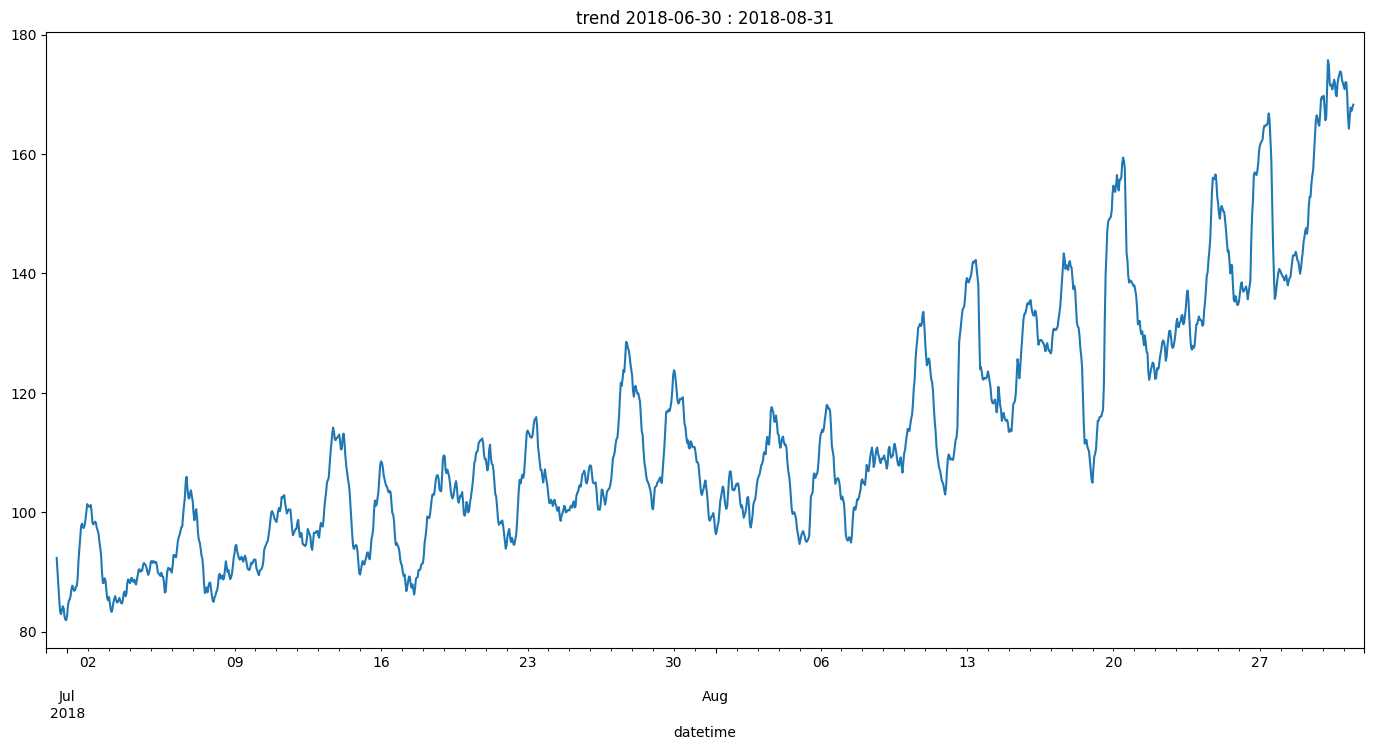

In [9]:
decomposed_data_taxi = seasonal_decompose(data_taxi['2018-06-30':'2018-08-31'])
decomposed_data_taxi.trend.plot(figsize=figsize, title=('trend 2018-06-30 : 2018-08-31'));

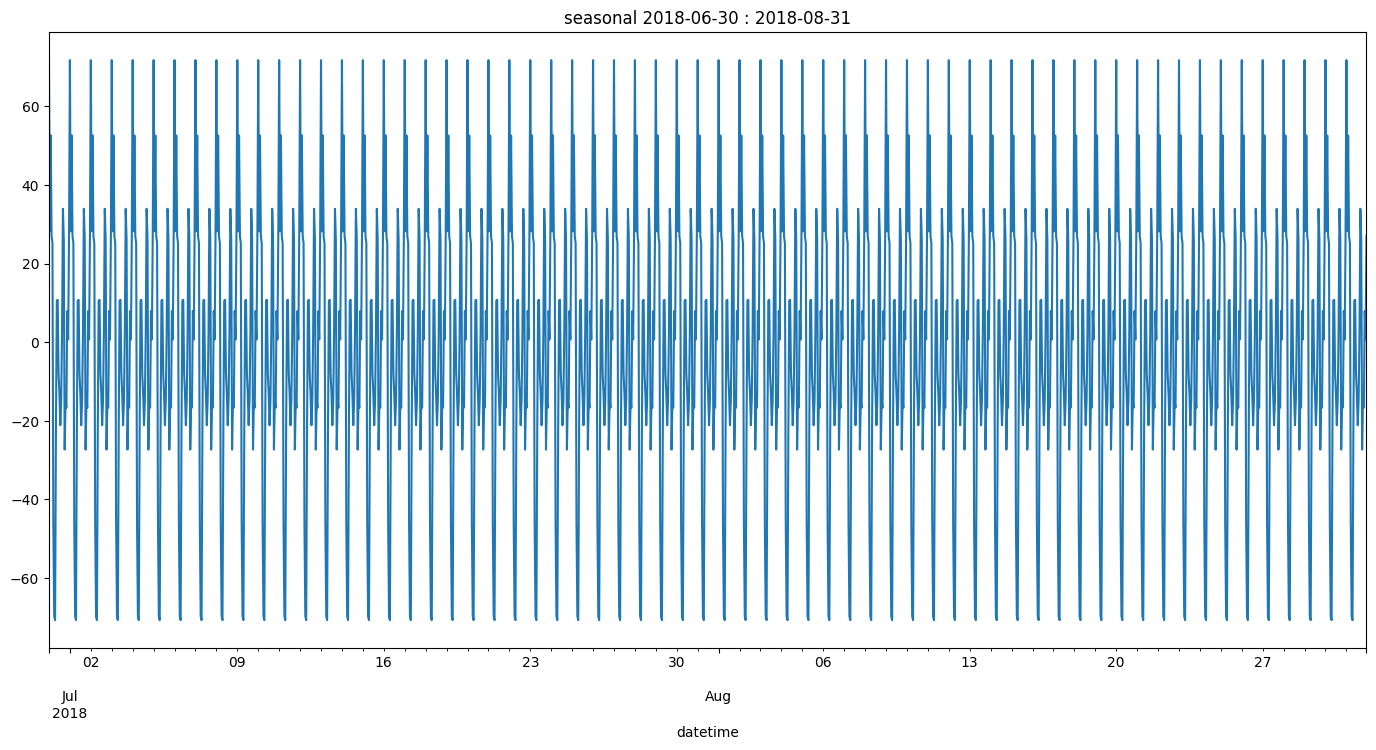

In [10]:
decomposed_data_taxi.seasonal.plot(figsize=figsize, title=('seasonal 2018-06-30 : 2018-08-31'));

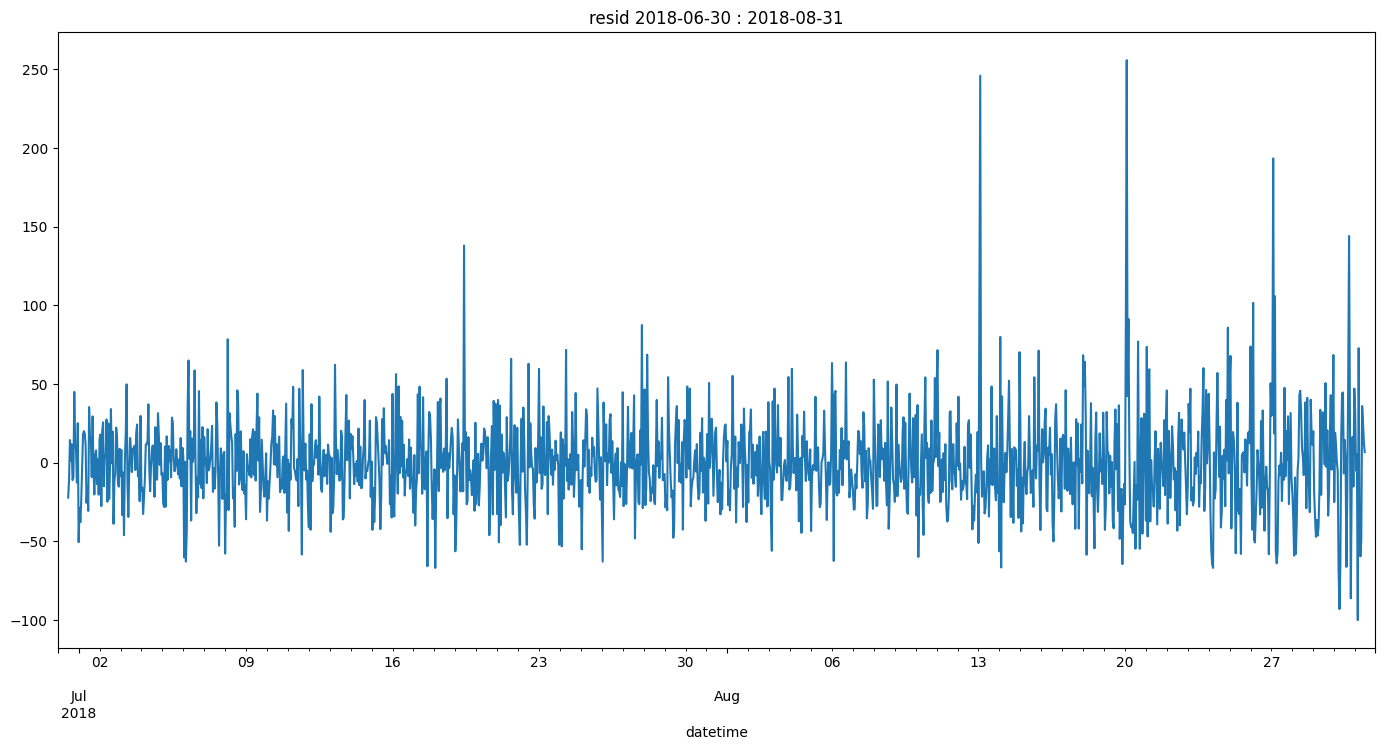

In [11]:
decomposed_data_taxi.resid.plot(figsize=figsize, title=('resid 2018-06-30 : 2018-08-31'));

    Дисперсия ряда со временем увеличивается.
    По тренду видно, что со временем все больше и больше людей пользуется услугой заказа такси.
    Каждый день видно, что такси требуются для ночных заказов и по наступлению утра намечается спад вызовов такси.
    
    Временной ряд в таком виде не является стационарным, так как подвержен тренду, который меняется во времени. Это можно
    подтвердить критерием Дики-Фуллера.

    Нулевая гипотеза гласит: "Временной ряд является нестацинарным". Альтернативная: "Временной ряд стационарен"

In [12]:
p_value = adfuller(data_taxi['num_orders'])[1]
print('P =', p_value)
if p_value < 0.05:
    print('Нулевая гипотеза отвергается. Ряд стационарен по критерию Дики-Фуллера')
else:
    print('Нулевая гипотеза не отвергается. Ряд нестационарен по критерию Дики-Фуллера')

P = 0.0289400514026132
Нулевая гипотеза отвергается. Ряд стационарен по критерию Дики-Фуллера


P = 0.028940051402612906

    Нулевая гипотеза отвергается. Ряд стационарен по критерию Дики-Фуллера

    При явном наличии тренда и сезонности, критерий Дики-Фуллера не значим.

    Исследуем, какие признаки нам понадобится.

    Так как видна ежедневная сезонность - то точно понадобится признак day.
    Тред показывает, что к концу недели и в середине идет увеличение заказов - добавим признак dayofweek.
    Из месяца в месяц данные отличаются и носят цикличный характер - добавим признак month.
    lag примем как 24 часа
    rolling_mean примем как сутки то есть 48 часа

### Создадим признаки для обучения модели.

In [13]:
max_lag = 168
rolling_mean_size = 168

def make_features(data, column, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    #data['month'] = data.index.month
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

### Используем TimeSeriesSplit вместо CV

In [14]:
data_taxi_copy = data_taxi.copy()
make_features(data_taxi,'num_orders', max_lag, rolling_mean_size)

train, test = train_test_split(data_taxi, shuffle=False, test_size=0.1)#, random_state=24072020)
train = train.dropna()

train_features = train.drop('num_orders', axis=1)
train_target = train['num_orders']
test_features = test.drop('num_orders', axis=1)
test_target = test['num_orders']

In [15]:
print('data_taxi:', data_taxi.shape[0])
print('train:', (train.shape[0]*100) / data_taxi.shape[0],'% |', 'С', train.index[0], 'по', train.index[-1])
print('test:', (test.shape[0]*100) / data_taxi.shape[0],'% |', 'С', test.index[0], 'по', test.index[-1])

data_taxi: 4416
train: 86.18659420289855 % | С 2018-03-08 00:00:00 по 2018-08-13 13:00:00
test: 10.009057971014492 % | С 2018-08-13 14:00:00 по 2018-08-31 23:00:00


### Вывод по шагу 2

    1) Данные были проанализированы.
    2) Были выявлены тренды и сезонность.
    3) Данные были подготовлены к обучению.
    4) Создана функция для кроссвалидации временных рядов.

## Обучение

Выберем следующие модели для обучения:

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>V2</b></font>
   
А если так попробовать ? ⬇
</div>

### Линейная регрессия

In [16]:
tscv = TimeSeriesSplit(n_splits=5)

In [17]:
%%time

regressor = LinearRegression()
print('# Train for root_mean_squared_error')
print()
cv_RMSE_LR = (cross_val_score(regressor, 
                             train_features, 
                             train_target, 
                             cv=tscv, 
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LR)

# Train for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 22.691753396661163
CPU times: total: 562 ms
Wall time: 358 ms


### Ridge

    Проведем кроссвалидацию для следующих моделей в два шага:

        1) С помощью GridSearchCV найдем лучший параметр.
        2) Используя cv_time_series_rmse получить результат кроссвалидации на временном ряду.

In [18]:
%%time

regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100, 1000],
                'solver':['auto', 'svd', 'cholesky', 'lsqr','sparse_cg']}]


print('# Tuning hyper-parameters for root_mean_squared_error')
print()
clf = GridSearchCV(regressor, cv=tscv, param_grid=hyperparams, scoring='neg_root_mean_squared_error')
clf.fit(train_features, train_target)

# Tuning hyper-parameters for root_mean_squared_error

CPU times: total: 6.58 s
Wall time: 4.39 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 1, 10, 100, 1000],
                          'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                     'sparse_cg']}],
             scoring='neg_root_mean_squared_error')

In [19]:
clf.best_estimator_

Ridge(alpha=1000)

In [20]:
clf.best_score_

-22.540295123114205

### CatBoostRegressor

In [21]:
%%time

regressor = CatBoostRegressor() 
hyperparams = [{'learning_rate':[0.1, 0.2, 0.3],
                'random_state':[24072020],
                'verbose':[False]}]

print('# Tuning hyper-parameters for root_mean_squared_error')
print()
clf = GridSearchCV(regressor, cv=tscv, param_grid=hyperparams, scoring='neg_root_mean_squared_error')
clf.fit(train_features, train_target)

# Tuning hyper-parameters for root_mean_squared_error

CPU times: total: 23min 22s
Wall time: 3min 17s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x0000024D4057BF40>,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3],
                          'random_state': [24072020], 'verbose': [False]}],
             scoring='neg_root_mean_squared_error')

In [22]:
clf.best_estimator_

In [23]:
clf.best_score_

-22.911035303072293

### LGBMRegressor

In [24]:
%%time

regressor = LGBMRegressor() 
hyperparams = [{'learning_rate':[x/10 for x in range(1, 6)],
                'random_state':[24072020]}]

print('# Tuning hyper-parameters for root_mean_squared_error')
print()
clf = GridSearchCV(regressor, cv=tscv, param_grid=hyperparams, scoring='neg_root_mean_squared_error')
clf.fit(train_features, train_target)

# Tuning hyper-parameters for root_mean_squared_error

CPU times: total: 1min 11s
Wall time: 9.35 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'random_state': [24072020]}],
             scoring='neg_root_mean_squared_error')

In [25]:
clf.best_estimator_

LGBMRegressor(random_state=24072020)

In [26]:
clf.best_score_

-23.258512484302322

### Вывод V2

Использовали 4 модели:

    1) Ridge - 22.54
    2) LinearRegression - 22.69
    3) CatBoostRegressor - 22.91
    4) LGBMRegressor - 23.26

C помощью best_estimator_ была выбрана лучша метрика "Ridge" т.к. в среднем модель ошибается в 22-23 случаях. Ridge показала себя лучше остальных моделий. LGBMRegressor показала себя хуже всех.

## Тестирование

### Ridge

In [27]:
%%time

target_predict = clf.best_estimator_.predict(test_features)
target_predict.min()

CPU times: total: 0 ns
Wall time: 0 ns


41.40069937686433

In [28]:
final_RMSE_Ridge = mean_squared_error(test_target, target_predict) ** 0.5
final_RMSE_Ridge

36.580846949083714

## Вывод

    Во время проекта были изучены способы предсказания веременных рядов за счет регрессоров.
    
    При lag = 168 и rolling_mean = 168
        1) Все модели выполнили свою задачу
        2) Лучше всего предсказала ряд модель Ridge - это значит, что модель в
        среднем ошибается на 36-37 заказа такси в час.
    